# Climate change time series

Some say climate change is the biggest threat of our age while others say it’s a myth based on dodgy science.

* [Set paths](#set-paths)
* [Loading data](#loading-data)
* [Global temperatures](#global-temperatures)
    * [Data description and distribution](#on-temperatures-data)
    * [Cleaning dataset](#temperatures-cleaning)
    * [Feature engineering](#fe-temperatures)
* [Temperatures by country](#by-country)
    * [Data description and distribution](#on-by-country-data)
    * [Cleaning dataset](#temperatures-by-country-cleaning)
    * [Feature engineering](#fe-temperatures-by-country)
* [Temperatures by state](#by-state)
    * [Data description and distribution](#on-by-state-data)
    * [Cleaning dataset](#temperatures-by-state-cleaning)
    * [Feature engineering](#fe-temperatures-by-state)
* [Is "climate change" a myth?](#myth)
* [How much has the planet's average surface temperature risen since the late 19th century?](#rise)
* [What are the hottest countries in the set?](#hottest-countries)


<a id="importing"></a>
## Importing libraries and packages

In [61]:
# Warnings
import warnings

# mathematical operations and data manipulation
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")
%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [62]:
# Path to datasets directory
data_path = "datasets"
# Path to assets directory (for saving results to)
assets_path = "assets"

<a id="loading-data"></a>
## Loading data

* [Temperatures](#temperatures)
* [Temperatures by country dataset](#country)
* [Temperatures by state dataset](#state)
* [Temperatures by city dataset](#city)
* [Temperatures by major city dataset](#major-city)
* [Geopanda's naturalearth_lowres dataset](#earth)

<a id="temperatures"></a>
### Temperatures

In [63]:
temperatures = pd.read_csv(f"{data_path}/GlobalTemperatures.csv")
# Shape of the dataset
print("Shape of the Global Temperatures dataset: ", temperatures.shape)
temperatures.head()

Shape of the Global Temperatures dataset:  (3192, 9)


dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

<a id="state"></a>
### Temperatures by state dataset

In [64]:
temperatures_states = pd.read_csv(
    f"{data_path}/GlobalLandTemperaturesByState.csv"
)
# Shape of the dataset
print(
    "Shape of the Global Land Temperatures By State dataset: ",
    temperatures_states.shape,
)
temperatures_states.head()

Shape of the Global Land Temperatures By State dataset:  (645675, 5)


dt  AverageTemperature  AverageTemperatureUncertainty State Country
0  1855-05-01              25.544                          1.171  Acre  Brazil
1  1855-06-01              24.228                          1.103  Acre  Brazil
2  1855-07-01              24.371                          1.044  Acre  Brazil
3  1855-08-01              25.427                          1.073  Acre  Brazil
4  1855-09-01              25.675                          1.014  Acre  Brazil

<a id="country"></a>
### Temperatures by country dataset

In [65]:
temperatures_countries = pd.read_csv(
    f"{data_path}/GlobalLandTemperaturesByCountry.csv"
)
# Shape of the dataset
print(
    "Shape of the Global Land Temperatures By Country dataset: ",
    temperatures_countries.shape,
)
temperatures_countries.head()

Shape of the Global Land Temperatures By Country dataset:  (577462, 4)


dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

<a id="city"></a>
### Temperatures by city dataset

In [66]:
temperatures_cities = pd.read_csv(
    f"{data_path}/GlobalLandTemperaturesByCity.csv"
)
# Shape of the dataset
print(
    "Shape of the Global Land Temperatures By City dataset: ",
    temperatures_cities.shape,
)
temperatures_cities.head()

Shape of the Global Land Temperatures By City dataset:  (8599212, 7)


dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

<a id="major-city"></a>
### Temperatures by major city dataset

In [67]:
temperatures_major_cities = pd.read_csv(
    f"{data_path}/GlobalLandTemperaturesByMajorCity.csv"
)
# Shape of the dataset
print(
    "Shape of the Global Land Temperatures By Major City dataset: ",
    temperatures_major_cities.shape,
)
temperatures_major_cities.head()

Shape of the Global Land Temperatures By Major City dataset:  (239177, 7)


dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan   
2  1849-03-01              28.101                          1.612  Abidjan   
3  1849-04-01              26.140                          1.387  Abidjan   
4  1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W

<a id="global-temperatures"></a>
## Global temperatures

<a id="on-temperatures-data"></a>
### Data description and distribution

- [Features](#temperatures-features)
- [Exploratory plots](#temperatures-plots)
- [Check for missing values](#temperatures-missing)
- [Check for duplicates](#temperatures-duplicates)
- [Check for outliers](#temperatures-outliers)

<a id="temperatures-features"></a>
#### Features

In [68]:
temperatures.tail()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  
3187                                      0.057  
3188                                      0.058  
3189                                      0.062  
3190                                      0.063  
3191                                      0.062

In [69]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


<a id="temperatures-plots"></a>
#### Exploratory plots

Text(0.5, 0, 'Year')

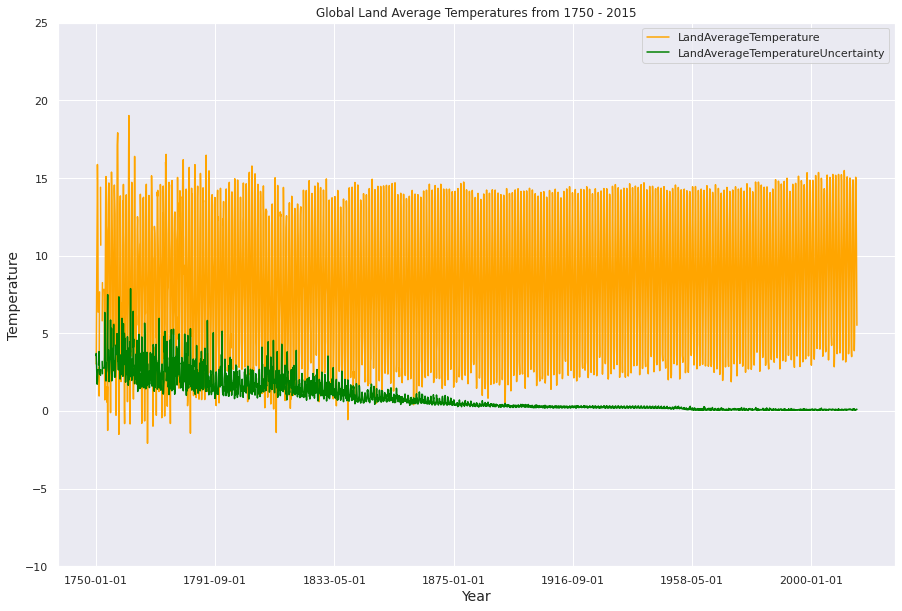

In [70]:
temperatures.plot(
    x="dt",
    y=["LandAverageTemperature", "LandAverageTemperatureUncertainty"],
    title="Global Land Average Temperatures from 1750 - 2015",
    figsize=(15, 10),
    color=("orange", "green"),
)
plt.ylim(-10, 25)
plt.ylabel("Temperature", fontsize=14)
plt.xlabel("Year", fontsize=14)

Text(0.5, 0, 'Year')

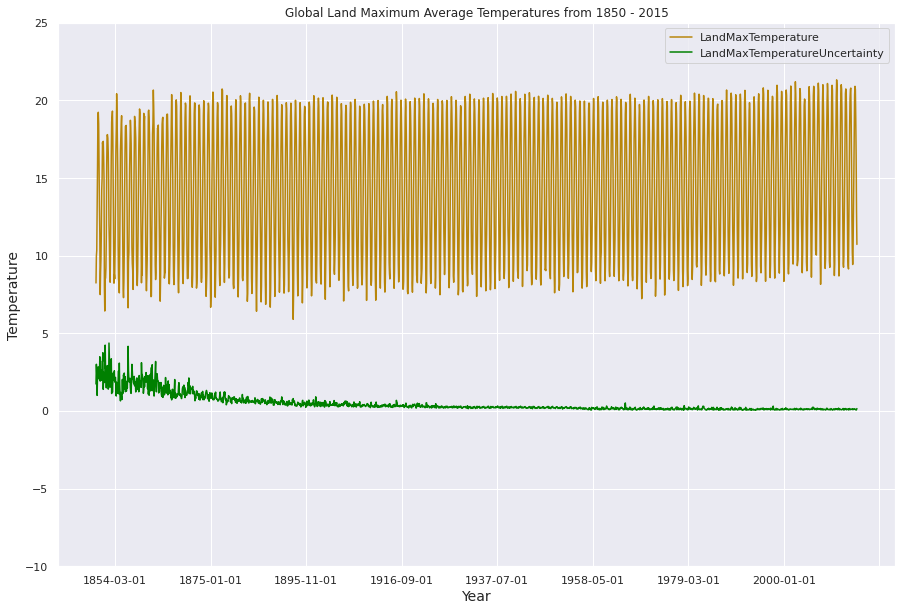

In [71]:
temperatures.plot(
    x="dt",
    y=["LandMaxTemperature", "LandMaxTemperatureUncertainty"],
    title="Global Land Maximum Average Temperatures from 1850 - 2015",
    figsize=(15, 10),
    color=("darkgoldenrod", "green"),
)
plt.ylim(-10, 25)
plt.ylabel("Temperature", fontsize=14)
plt.xlabel("Year", fontsize=14)

Text(0.5, 0, 'Year')

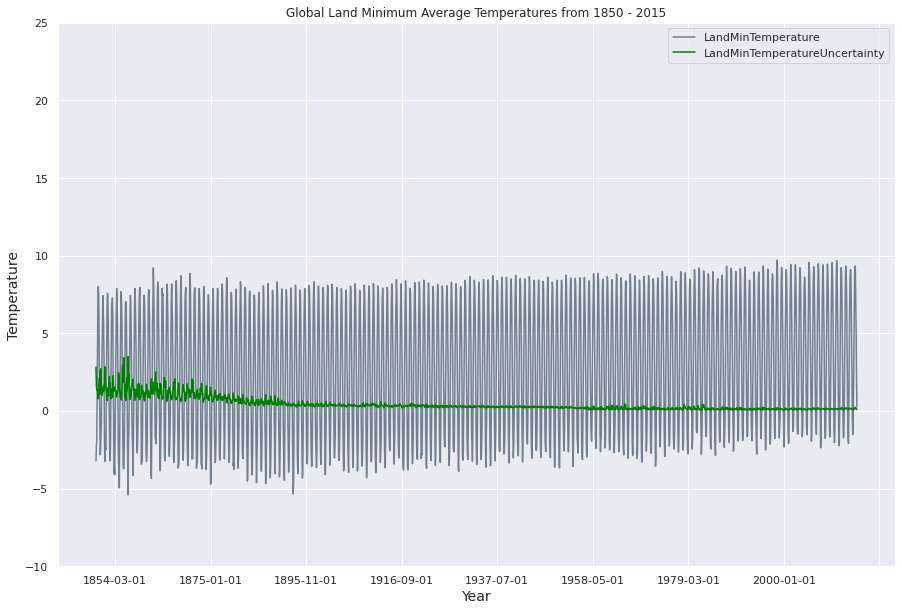

In [72]:
temperatures.plot(
    x="dt",
    y=["LandMinTemperature", "LandMinTemperatureUncertainty"],
    title="Global Land Minimum Average Temperatures from 1850 - 2015",
    figsize=(15, 10),
    color=("slategray", "green"),
)
plt.ylim(-10, 25)
plt.ylabel("Temperature", fontsize=14)
plt.xlabel("Year", fontsize=14)

Text(0.5, 0, 'Year')

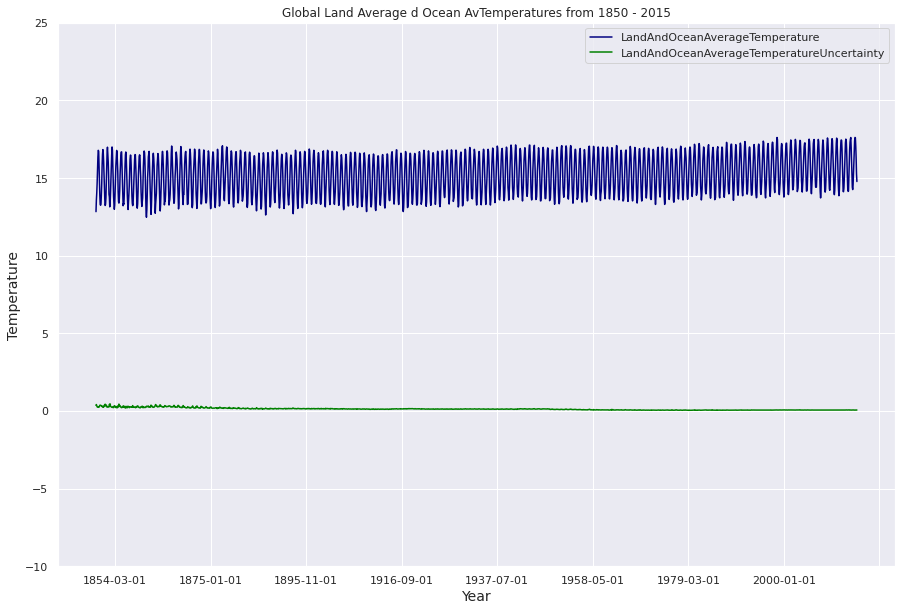

In [73]:
temperatures.plot(
    x="dt",
    y=[
        "LandAndOceanAverageTemperature",
        "LandAndOceanAverageTemperatureUncertainty",
    ],
    title="Global Land Average d Ocean AvTemperatures from 1850 - 2015",
    figsize=(15, 10),
    color=("navy", "green"),
)
plt.ylim(-10, 25)
plt.ylabel("Temperature", fontsize=14)
plt.xlabel("Year", fontsize=14)

<a id="temperatures-missing"></a>
#### Check for missing values

In [74]:
temperatures.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

<a id="temperatures-duplicates"></a>
#### Check for duplicate values

In [75]:
format(len(temperatures[temperatures.duplicated()]))

'0'

<a id="temperatures-outliers"></a>
#### Check for outliers

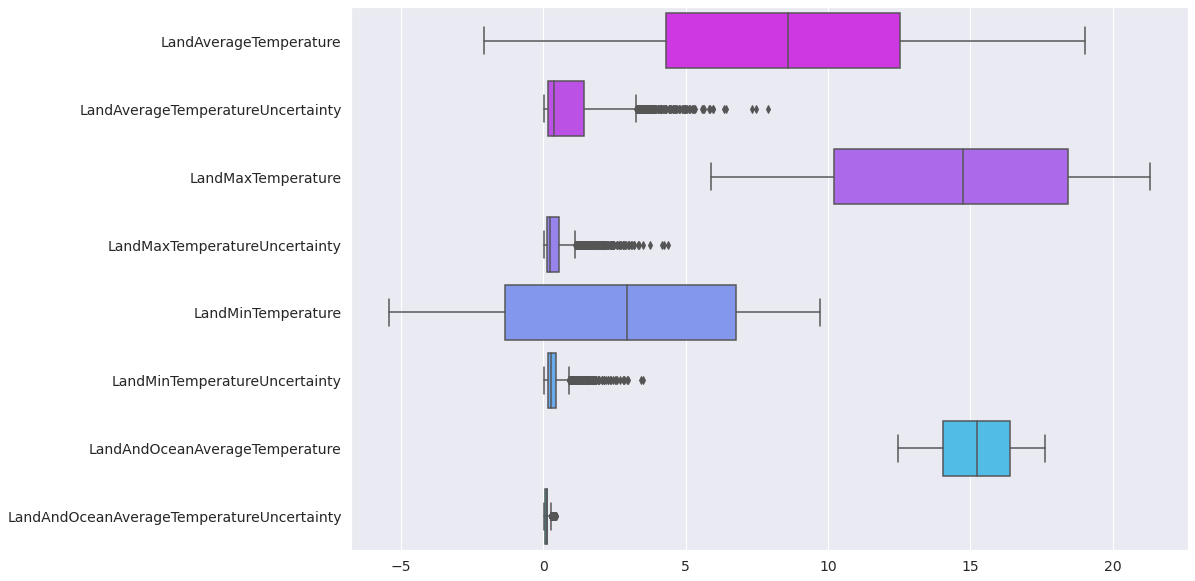

In [76]:
sns.set(rc={"figure.figsize": (15, 10)})
ax = sns.boxplot(data=temperatures, orient="h", palette="cool_r")
ax.tick_params(labelsize=14)

<a id="temperatures-cleaning"></a>
### Cleaning temperatures dataset

- [Dealing with missing values](#missing-temperatures)

<a id="missing-temperatures"></a>
#### Dealing with missing values

In [77]:
# The observations with missing LandAverageTemperature values
temperatures[pd.isnull(temperatures["LandAverageTemperature"])]

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
10  1750-11-01                     NaN                                NaN   
16  1751-05-01                     NaN                                NaN   
18  1751-07-01                     NaN                                NaN   
21  1751-10-01                     NaN                                NaN   
22  1751-11-01                     NaN                                NaN   
23  1751-12-01                     NaN                                NaN   
25  1752-02-01                     NaN                                NaN   
28  1752-05-01                     NaN                                NaN   
29  1752-06-01                     NaN                                NaN   
30  1752-07-01                     NaN                                NaN   
31  1752-08-01                     NaN                                NaN   
32  1752-09-01                     NaN                                NaN   

    LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
10                 NaN                            NaN                 NaN   
16                 NaN                            NaN                 NaN   
18                 NaN                            NaN                 NaN   
21                 NaN                            NaN                 NaN   
22                 NaN                            NaN                 NaN   
23                 NaN                            NaN                 NaN   
25                 NaN                            NaN                 NaN   
28                 NaN                            NaN                 NaN   
29                 NaN                            NaN                 NaN   
30                 NaN                            NaN                 NaN   
31                 NaN                            NaN                 NaN   
32                 NaN                            NaN                 NaN   

    LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
10                            NaN                             NaN   
16                            NaN                             NaN   
18                            NaN                             NaN   
21                            NaN                             NaN   
22                            NaN                             NaN   
23                            NaN                             NaN   
25                            NaN                             NaN   
28                            NaN                             NaN   
29                            NaN                             NaN   
30                            NaN                             NaN   
31                            NaN                             NaN   
32                            NaN                             NaN   

    LandAndOceanAverageTemperatureUncertainty  
10                                        NaN  
16                                        NaN  
18                                        NaN  
21                                        NaN  
22                                        NaN  
23                                        NaN  
25                                        NaN  
28                                        NaN  
29                                        NaN  
30                                        NaN  
31                                        NaN  
32                                        NaN

In [78]:
temperatures[pd.isnull(temperatures["LandMaxTemperature"])]

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
1195  1849-08-01                  13.603                              0.902   
1196  1849-09-01                  11.093                              0.568   
1197  1849-10-01                   8.890                              0.733   
1198  1849-11-01                   5.778                              1.313   
1199  1849-12-01                   1.923                              0.908   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN                            NaN                 NaN   
2                    NaN                            NaN                 NaN   
3                    NaN                            NaN                 NaN   
4                    NaN                            NaN                 NaN   
...                  ...                            ...                 ...   
1195                 NaN                            NaN                 NaN   
1196                 NaN                            NaN                 NaN   
1197                 NaN                            NaN                 NaN   
1198                 NaN                            NaN                 NaN   
1199                 NaN                            NaN                 NaN   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
...                             ...                             ...   
1195                            NaN                             NaN   
1196                            NaN                             NaN   
1197                            NaN                             NaN   
1198                            NaN                             NaN   
1199                            NaN                             NaN   

      LandAndOceanAverageTemperatureUncertainty  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  
...                                         ...  
1195                                        NaN  
1196                                        NaN  
1197                                        NaN  
1198                                        NaN  
1199                                        NaN  

[1200 rows x 9 columns]

In [79]:
temperatures[pd.isnull(temperatures["LandMinTemperature"])]

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
1195  1849-08-01                  13.603                              0.902   
1196  1849-09-01                  11.093                              0.568   
1197  1849-10-01                   8.890                              0.733   
1198  1849-11-01                   5.778                              1.313   
1199  1849-12-01                   1.923                              0.908   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN                            NaN                 NaN   
2                    NaN                            NaN                 NaN   
3                    NaN                            NaN                 NaN   
4                    NaN                            NaN                 NaN   
...                  ...                            ...                 ...   
1195                 NaN                            NaN                 NaN   
1196                 NaN                            NaN                 NaN   
1197                 NaN                            NaN                 NaN   
1198                 NaN                            NaN                 NaN   
1199                 NaN                            NaN                 NaN   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
...                             ...                             ...   
1195                            NaN                             NaN   
1196                            NaN                             NaN   
1197                            NaN                             NaN   
1198                            NaN                             NaN   
1199                            NaN                             NaN   

      LandAndOceanAverageTemperatureUncertainty  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  
...                                         ...  
1195                                        NaN  
1196                                        NaN  
1197                                        NaN  
1198                                        NaN  
1199                                        NaN  

[1200 rows x 9 columns]

In [80]:
temperatures[pd.isnull(temperatures["LandAndOceanAverageTemperature"])]

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
1195  1849-08-01                  13.603                              0.902   
1196  1849-09-01                  11.093                              0.568   
1197  1849-10-01                   8.890                              0.733   
1198  1849-11-01                   5.778                              1.313   
1199  1849-12-01                   1.923                              0.908   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN                            NaN                 NaN   
2                    NaN                            NaN                 NaN   
3                    NaN                            NaN                 NaN   
4                    NaN                            NaN                 NaN   
...                  ...                            ...                 ...   
1195                 NaN                            NaN                 NaN   
1196                 NaN                            NaN                 NaN   
1197                 NaN                            NaN                 NaN   
1198                 NaN                            NaN                 NaN   
1199                 NaN                            NaN                 NaN   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
...                             ...                             ...   
1195                            NaN                             NaN   
1196                            NaN                             NaN   
1197                            NaN                             NaN   
1198                            NaN                             NaN   
1199                            NaN                             NaN   

      LandAndOceanAverageTemperatureUncertainty  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  
...                                         ...  
1195                                        NaN  
1196                                        NaN  
1197                                        NaN  
1198                                        NaN  
1199                                        NaN  

[1200 rows x 9 columns]

We can either impute the missing values, or we can start analysis at 1850, after which there are no missing values. For our purpose (visualizing warming trends) we can miss that first century, as the data had higher uncertainty anyway, and temperatures were still quite stable.

In [81]:
temperatures_1850 = temperatures.copy(deep=True)
temperatures_1850.drop(temperatures_1850.index[:1200], inplace=True)
temperatures_1850 = temperatures_1850.reset_index(drop=True)
temperatures_1850.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1850-01-01                   0.749                              1.105   
1  1850-02-01                   3.071                              1.275   
2  1850-03-01                   4.954                              0.955   
3  1850-04-01                   7.217                              0.665   
4  1850-05-01                  10.004                              0.617   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0               8.242                          1.738              -3.206   
1               9.970                          3.007              -2.291   
2              10.347                          2.401              -1.905   
3              12.934                          1.004               1.018   
4              15.655                          2.406               3.811   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                          2.822                          12.833   
1                          1.623                          13.588   
2                          1.410                          14.043   
3                          1.329                          14.667   
4                          1.347                          15.507   

   LandAndOceanAverageTemperatureUncertainty  
0                                      0.367  
1                                      0.414  
2                                      0.341  
3                                      0.267  
4                                      0.249

In [82]:
temperatures_1850.tail()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1987  2015-08-01                  14.755                              0.072   
1988  2015-09-01                  12.999                              0.079   
1989  2015-10-01                  10.801                              0.102   
1990  2015-11-01                   7.433                              0.119   
1991  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
1987              20.699                          0.110               9.005   
1988              18.845                          0.088               7.199   
1989              16.450                          0.059               5.232   
1990              12.892                          0.093               2.157   
1991              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
1987                          0.170                          17.589   
1988                          0.229                          17.049   
1989                          0.115                          16.290   
1990                          0.106                          15.252   
1991                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  
1987                                      0.057  
1988                                      0.058  
1989                                      0.062  
1990                                      0.063  
1991                                      0.062

In [83]:
temperatures_1850.isnull().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

<a id="fe-temperatures"></a>
### Feature engineering

- [Time conversion](#tc-temperatures)

<a id="tc-temperatures"></a>
#### Time conversion

In [84]:
# Convert column 'dt' to a 'Date' column of datatype 'Datetime'
temperatures_1850.rename(columns={"dt": "Date"}, inplace=True)
temperatures_1850["Date"] = pd.to_datetime(temperatures_1850["Date"])
temperatures_1850.set_index("Date", inplace=True)
temperatures_1850.index

DatetimeIndex(['1850-01-01', '1850-02-01', '1850-03-01', '1850-04-01',
               '1850-05-01', '1850-06-01', '1850-07-01', '1850-08-01',
               '1850-09-01', '1850-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', length=1992, freq=None)

<a id="by-country"></a>
## Temperatures by country

<a id="on-by-country-data"></a>
### Data description and distribution

- [Features](#by-country-features)
- [Exploratory plots](#by-country-plots)
- [Check for missing values](#by-country-missing)
- [Check for duplicates](#by-country-duplicates)
- [Check for outliers](#by-country-outliers)

<a id="by-country-features"></a>
#### Features

In [85]:
temperatures_countries.tail()

dt  AverageTemperature  AverageTemperatureUncertainty  \
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  
577461  Zimbabwe

In [86]:
temperatures_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


<a id="by-country-plots"></a>
#### Exploratory plots

Text(0.5, 0, 'Year')

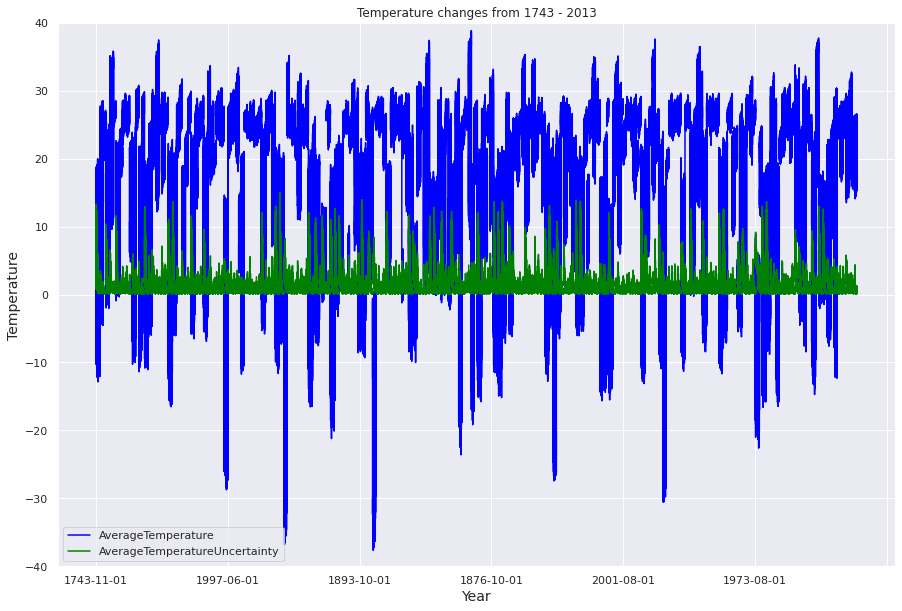

In [87]:
temperatures_countries.plot(
    x="dt",
    y=["AverageTemperature", "AverageTemperatureUncertainty"],
    title="Temperature changes from 1743 - 2013",
    figsize=(15, 10),
    color=("blue", "green"),
)
plt.ylim(-40, 40)
plt.ylabel("Temperature", fontsize=14)
plt.xlabel("Year", fontsize=14)

<a id="by-country-missing"></a>
#### Check for missing values

In [88]:
temperatures_countries.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

<a id="by-country-duplicates"></a>
#### Check for duplicates

In [89]:
format(len(temperatures_countries[temperatures_countries.duplicated()]))

'0'

<a id="by-country-outliers"></a>
#### Check for outliers

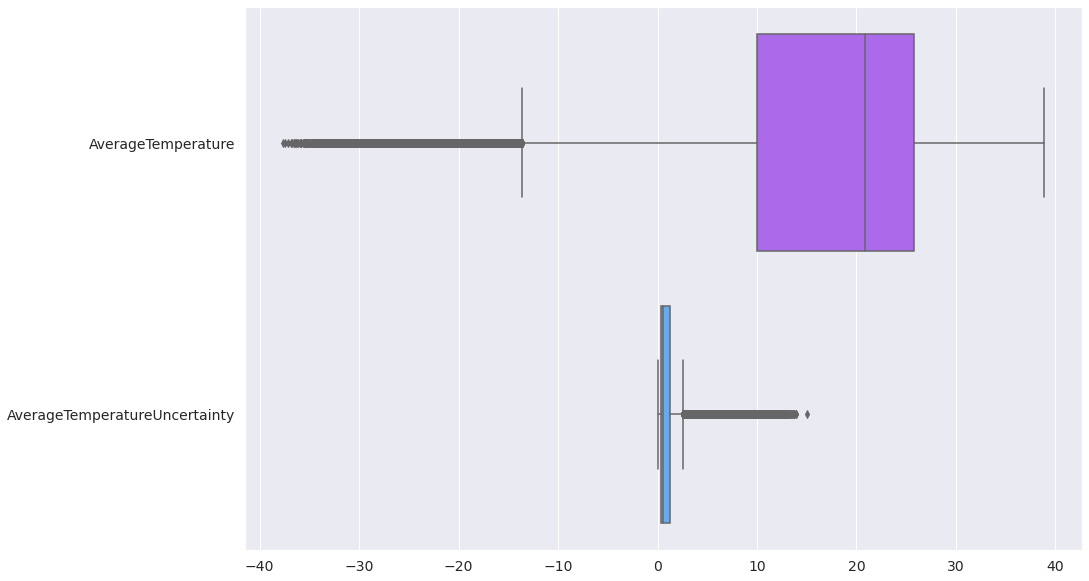

In [90]:
sns.set(rc={"figure.figsize": (15, 10)})
ax = sns.boxplot(data=temperatures_countries, orient="h", palette="cool_r")
ax.tick_params(labelsize=14)

<a id="temperatures-by-country-cleaning"></a>
### Cleaning temperatures dataset

- [Dealing with missing values](#missing-temperatures-by-country)

<a id="missing-temperatures-by-country"></a>
#### Dealing with missing values

In [91]:
# The observations with missing AverageTemperature values
temperatures_countries[pd.isnull(temperatures_countries["AverageTemperature"])]

dt  AverageTemperature  AverageTemperatureUncertainty  \
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
9       1744-08-01                 NaN                            NaN   
...            ...                 ...                            ...   
575800  1875-04-01                 NaN                            NaN   
575852  1879-08-01                 NaN                            NaN   
575853  1879-09-01                 NaN                            NaN   
575854  1879-10-01                 NaN                            NaN   
577461  2013-09-01                 NaN                            NaN   

         Country  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
9          Åland  
...          ...  
575800  Zimbabwe  
575852  Zimbabwe  
575853  Zimbabwe  
575854  Zimbabwe  
577461  Zimbabwe  

[32651 rows x 4 columns]

In [92]:
temperatures_countries_1900 = temperatures_countries.copy(deep=True)
# Drop Antarctica observations
temperatures_countries_1900 = temperatures_countries_1900[
    temperatures_countries_1900.Country != "Antarctica"
]
# Drop all observations before 01-01-1900
temperatures_countries_1900 = temperatures_countries_1900[
    temperatures_countries_1900.dt > "1900-01-01"
]
temperatures_countries_1900.isnull().sum()

dt                                 0
AverageTemperature               284
AverageTemperatureUncertainty    284
Country                            0
dtype: int64

In [93]:
temperatures_countries_1900.dropna(inplace=True)

<a id="fe-temperatures-by-country"></a>
### Feature engineering

- [Country names replace](#names-temperatures-by-country)
- [Time conversions](#tc-temperatures-by-country)

<a id="names-temperatures-by-country"></a>
#### Country names

The dataframe contains some Country names with (Europe) after the name.

In [94]:
# Get country names containing (Europe)
df = temperatures_countries_1900[
    temperatures_countries_1900["Country"].str.contains("(Europe)")
]
countries_list = sorted(df["Country"].unique())
print(countries_list)

['Denmark (Europe)', 'Europe', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)']


In [95]:
countries_list.remove("Europe")
print(countries_list)

['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)']


In [96]:
replace_list = ["Denmark", "France", "Netherlands", "United Kingdom"]
# Replace
temperatures_countries_1900["Country"] = temperatures_countries_1900[
    "Country"
].replace(countries_list, replace_list)

In [97]:
# Check this has not caused duplicates
format(
    len(temperatures_countries_1900[temperatures_countries_1900.duplicated()])
)

'0'

<a id="tc-temperatures-by-country"></a>
#### Time conversions

In [98]:
# Conversion for world map showing annual average per country
# Add a year column
years = pd.DatetimeIndex(temperatures_countries_1900["dt"]).year
temperatures_countries_1900.insert(1, "Year", years)
temperatures_countries_1900.head()

dt  Year  AverageTemperature  AverageTemperatureUncertainty  \
1875  1900-02-01  1900              -8.063                          0.657   
1876  1900-03-01  1900              -3.196                          0.467   
1877  1900-04-01  1900               0.781                          0.224   
1878  1900-05-01  1900               4.960                          0.503   
1879  1900-06-01  1900              12.296                          1.129   

     Country  
1875   Åland  
1876   Åland  
1877   Åland  
1878   Åland  
1879   Åland

In [99]:
temperatures_countries_annual_average = temperatures_countries_1900.groupby(
    by=["Country", "Year"]
).mean()
temperatures_countries_annual_average = (
    temperatures_countries_annual_average.reset_index()
)
temperatures_countries_annual_average = (
    temperatures_countries_annual_average.sort_values("Year", ascending=True)
)
temperatures_countries_annual_average.head(15)

Country  Year  AverageTemperature  \
0                Afghanistan  1900           15.310909   
26345         Virgin Islands  1900           26.287545   
21557             Seychelles  1900           26.718273   
8549           French Guiana  1900           25.739909   
15518                Mayotte  1900           26.467818   
4104                Cambodia  1900           26.835091   
15632                 Mexico  1900           20.986636   
21443                 Serbia  1900           11.410909   
4218                Cameroon  1900           24.221727   
8435                  France  1900           12.407955   
11072                Hungary  1900           11.213636   
21329                Senegal  1900           28.253182   
21215           Saudi Arabia  1900           26.413091   
4332                  Canada  1900           -3.328636   
21101  Sao Tome And Principe  1900           25.636091   

       AverageTemperatureUncertainty  
0                           0.731818  
26345                       0.735727  
21557                       0.786455  
8549                        0.795727  
15518                       0.715545  
4104                        0.735455  
15632                       0.581182  
21443                       0.598364  
4218                        0.857455  
8435                        0.541682  
11072                       0.515909  
21329                       0.869818  
21215                       0.811091  
4332                        1.038091  
21101                       0.757818

In [100]:
temperatures_countries_annual_average.to_csv(
    "datasets/temperatures_countries_annual_average.csv", index=False
)

In [101]:
# Convert column 'dt' to a 'Date' column of datatype 'Datetime'
temperatures_countries_1900.rename(columns={"dt": "Date"}, inplace=True)
temperatures_countries_1900["Date"] = pd.to_datetime(
    temperatures_countries_1900["Date"]
)
temperatures_countries_1900.set_index("Date", inplace=True)
temperatures_countries_1900.index

DatetimeIndex(['1900-02-01', '1900-03-01', '1900-04-01', '1900-05-01',
               '1900-06-01', '1900-07-01', '1900-08-01', '1900-09-01',
               '1900-10-01', '1900-11-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=328582, freq=None)

<a id="on-by-state-data"></a>
## Temperatures by state

<a id="by-state"></a>
### Data description and distribution

- [Features](#by-state-features)
- [Exploratory plots](#by-state-plots)
- [Check for missing values](#by-state-missing)
- [Check for duplicates](#by-state-duplicates)
- [Check for outliers](#by-state-outliers)

<a id="by-state-features"></a>
#### Features

In [102]:
temperatures_states.tail()

dt  AverageTemperature  AverageTemperatureUncertainty  \
645670  2013-05-01              21.634                          0.578   
645671  2013-06-01              24.679                          0.596   
645672  2013-07-01              29.272                          1.340   
645673  2013-08-01              29.202                          0.869   
645674  2013-09-01                 NaN                            NaN   

           State Country  
645670  Zhejiang   China  
645671  Zhejiang   China  
645672  Zhejiang   China  
645673  Zhejiang   China  
645674  Zhejiang   China

<a id="by-state-plots"></a>
#### Exploratory plots

Text(0.5, 0, 'Year')

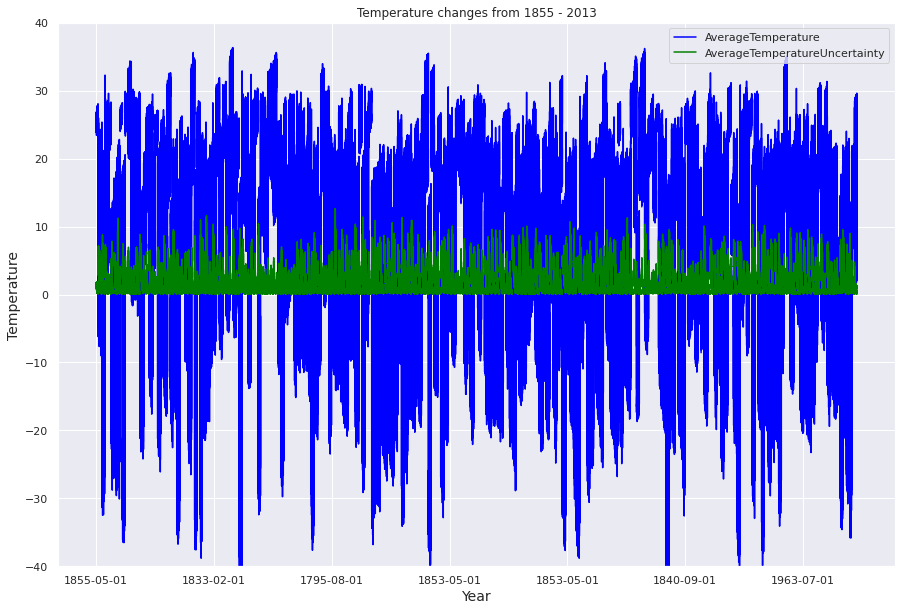

In [103]:
temperatures_states.plot(
    x="dt",
    y=["AverageTemperature", "AverageTemperatureUncertainty"],
    title="Temperature changes from 1855 - 2013",
    figsize=(15, 10),
    color=("blue", "green"),
)
plt.ylim(-40, 40)
plt.ylabel("Temperature", fontsize=14)
plt.xlabel("Year", fontsize=14)

<a id="by-state-missing"></a>
#### Check for missing values

In [104]:
temperatures_states.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

<a id="by-state-duplicates"></a>
#### Check for duplicates

In [105]:
format(len(temperatures_states[temperatures_states.duplicated()]))

'0'

<a id="by-state-outliers"></a>
#### Check for outliers

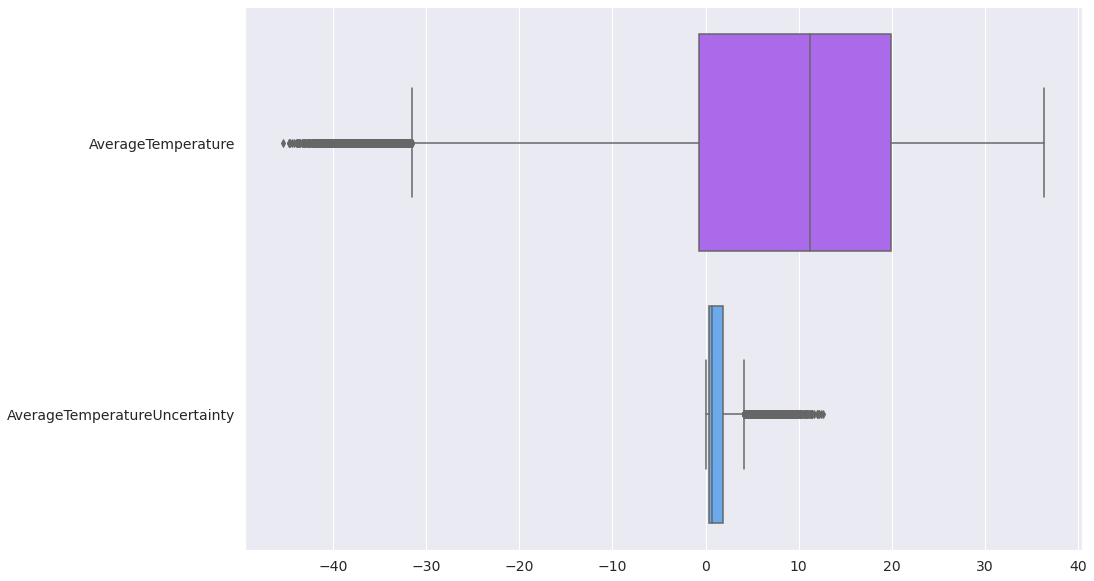

In [106]:
sns.set(rc={"figure.figsize": (15, 10)})
ax = sns.boxplot(data=temperatures_states, orient="h", palette="cool_r")
ax.tick_params(labelsize=14)

<a id="temperatures-by-state-cleaning"></a>
### Cleaning dataset

<a id="missing-temperatures-by-state"></a>
#### Dealing with missing values

In [107]:
# The observations with missing AverageTemperature values
temperatures_states[pd.isnull(temperatures_states["AverageTemperature"])]

dt  AverageTemperature  AverageTemperatureUncertainty  \
14      1856-07-01                 NaN                            NaN   
20      1857-01-01                 NaN                            NaN   
21      1857-02-01                 NaN                            NaN   
22      1857-03-01                 NaN                            NaN   
23      1857-04-01                 NaN                            NaN   
...            ...                 ...                            ...   
641790  1862-10-01                 NaN                            NaN   
641791  1862-11-01                 NaN                            NaN   
641792  1862-12-01                 NaN                            NaN   
643601  2013-09-01                 NaN                            NaN   
645674  2013-09-01                 NaN                            NaN   

           State Country  
14          Acre  Brazil  
20          Acre  Brazil  
21          Acre  Brazil  
22          Acre  Brazil  
23          Acre  Brazil  
...          ...     ...  
641790    Yunnan   China  
641791    Yunnan   China  
641792    Yunnan   China  
643601    Yunnan   China  
645674  Zhejiang   China  

[25648 rows x 5 columns]

In [108]:
temperatures_states_1900 = temperatures_states.copy(deep=True)
# Drop all observations before 01-01-1900
temperatures_states_1900 = temperatures_states_1900[
    temperatures_states_1900.dt > "1900-01-01"
]
temperatures_states_1900.isnull().sum()

dt                                 0
AverageTemperature               181
AverageTemperatureUncertainty    181
State                              0
Country                            0
dtype: int64

In [109]:
temperatures_states_1900.dropna(inplace=True)

<a id="fe-temperatures-by-state"></a>
### Feature engineering

- [Country names replace](#names-temperatures-by-state)
- [Time conversion](#tc-temperatures-by-state)

<a id="names-temperatures-by-state"></a>
#### Country names

In [110]:
df_states = temperatures_states_1900[
    temperatures_states_1900["Country"].str.contains("(Europe)")
]
df_states

Empty DataFrame
Columns: [dt, AverageTemperature, AverageTemperatureUncertainty, State, Country]
Index: []

The dataframe does not contain Country names with (Europe) after the name.

<a id="tc-temperatures-by-state"></a>
#### Time conversion

In [111]:
# Convert column 'dt' to a 'Date' column of datatype 'Datetime'
temperatures_states_1900.rename(columns={"dt": "Date"}, inplace=True)
temperatures_states_1900["Date"] = pd.to_datetime(
    temperatures_states_1900["Date"]
)
temperatures_states_1900.set_index("Date", inplace=True)
temperatures_states_1900.index

DatetimeIndex(['1900-02-01', '1900-03-01', '1900-04-01', '1900-05-01',
               '1900-06-01', '1900-07-01', '1900-08-01', '1900-09-01',
               '1900-10-01', '1900-11-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=328543, freq=None)

<a id="myth"></a>
## Is "climate change" a myth?

* [Visalisation per resampled plot](#resampled-plot)
* [Dickey-Fuller test](#dickey-fuller)
* [Decomposition](#decomposition)


<a id="resampled-plot"></a>
### Visalisation per resampled plot

In [112]:
# Resampling years by mean of calendar year-end
resampled_temperatures_countries_1900 = (
    temperatures_countries_1900[["AverageTemperature"]].resample("A").mean()
)
resampled_temperatures_countries_1900.head()

AverageTemperature
Date                          
1900-12-31           18.975323
1901-12-31           18.491193
1902-12-31           18.328011
1903-12-31           18.434771
1904-12-31           18.211075

In [113]:
resampled_temperatures_countries_1900.tail()

AverageTemperature
Date                          
2009-12-31           19.546385
2010-12-31           19.629806
2011-12-31           19.456040
2012-12-31           19.468744
2013-12-31           19.877007

[Panda's resampling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) generates a unique sampling distribution on the basis of the actual data. [Various frequencies can be used](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling) to resample time series data.

Text(0.5, 0, 'Year')

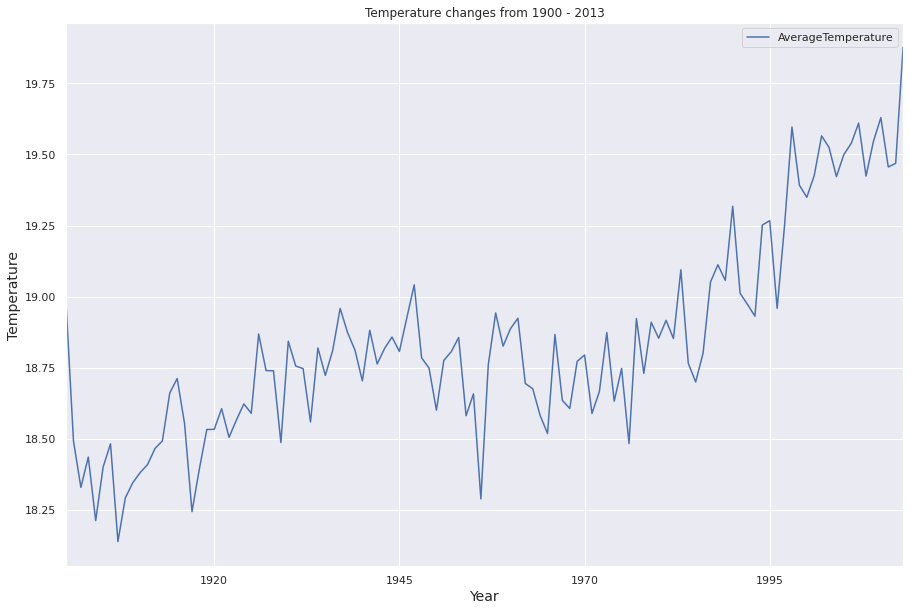

In [114]:
resampled_temperatures_countries_1900.plot(
    title="Temperature changes from 1900 - 2013", figsize=(15, 10)
)
plt.ylabel("Temperature", fontsize=14)
plt.xlabel("Year", fontsize=14)

<a id="dicky-fuller"></a>
### Dickey-Fuller test

The Augmented Dickey-Fuller test is a statistical test (one of the unit root tests). It determines how strongly a time series is defined by a trend. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

* Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

Results of the test can be interpreted using the p-value from the test:

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [115]:
print("Dickey Fuller Test Results")
test_df = adfuller(
    resampled_temperatures_countries_1900.iloc[:, 0].values, autolag="AIC"
)
df_output = pd.Series(
    test_df[0:4],
    index=[
        "Test Statistic",
        "p-value",
        "Lags Used",
        "Number of Observations Used",
    ],
)
for key, value in test_df[4].items():
    df_output["Critical value (%s)" % key] = value
print(df_output)

Dickey Fuller Test Results
Test Statistic                   0.366795
p-value                          0.980210
Lags Used                        5.000000
Number of Observations Used    108.000000
Critical value (1%)             -3.492401
Critical value (5%)             -2.888697
Critical value (10%)            -2.581255
dtype: float64


The p-value of 0.980210 is way above 0.05 => Not stationary => The way in which the data changes, changes. Not a myth. And because natural drivers would push our planet toward a cooling period, most likely caused by human interventions.

<a id="decomposition"></a>
### Decomposition

* The Trend component refers to the pattern in the data that spans across seasonal periods.
* The seasonal component explains the periodics. A time series can contain multiple superimposed seasonal periods: Because the Earth rotates around its axis, the graph of hourly temperatures at a weather station will show a seasonal period of 24 hours. The Earth also revolves around the Sun in a tilted manner, leading to seasonal temperature variations.
* A residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.

<Figure size 1080x720 with 0 Axes>

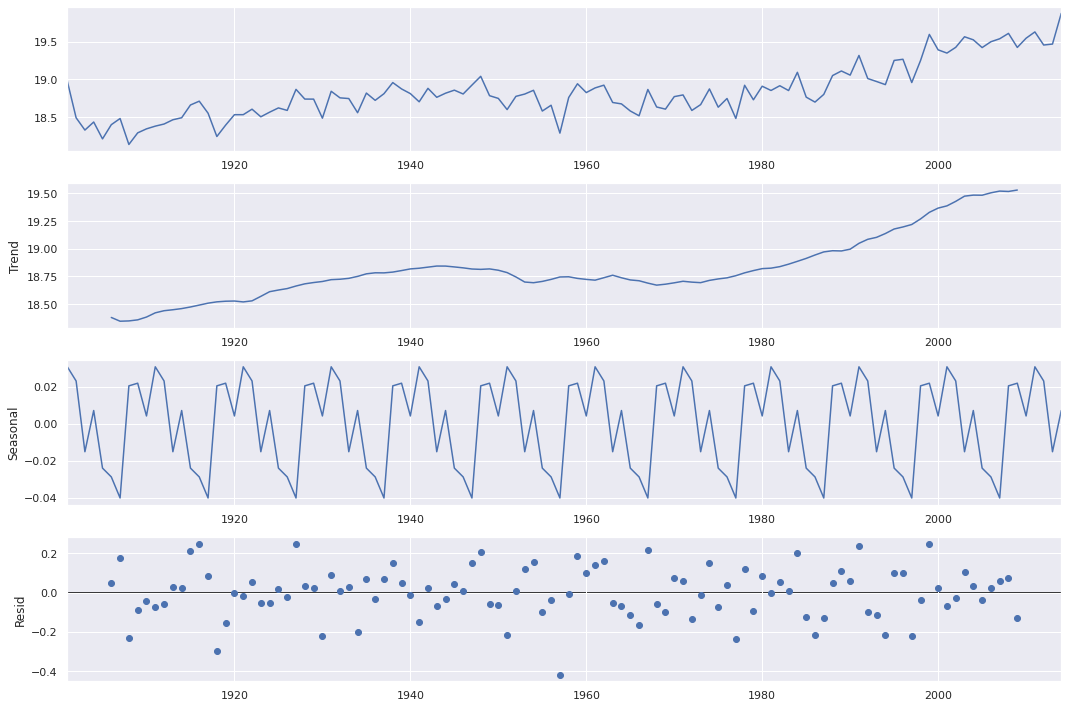

<Figure size 1080x720 with 0 Axes>

In [116]:
seasonal_decompose(resampled_temperatures_countries_1900, period=10).plot()
plt.figure(figsize=(15, 10))

<a id="rise"></a>
## How much has the planet's average surface temperature risen since the late 19th century?

We calculated between 1900 until 2013, based on the averaged resampled "By Country" dataset. Since then however, global temperatures have been rising even faster. To give a better answer we have to look for a more updated dataset.

In [117]:
print(
    resampled_temperatures_countries_1900.loc["2013-12-31"]
    - resampled_temperatures_countries_1900.loc["1900-12-31"]
)

AverageTemperature    0.901684
dtype: float64


<a id="hottest-countries"></a>
## What are the 10 hottest countries in the set?

In [118]:
# Grouping available data based on average temperature
print(
    temperatures_countries_1900[["Country", "AverageTemperature"]]
    .groupby(["Country"])
    .mean()
    .sort_values("AverageTemperature", ascending=False)
    .head(10)
)

                      AverageTemperature
Country                                 
Djibouti                       28.885034
Mali                           28.625875
Burkina Faso                   28.291175
Senegal                        28.133466
Aruba                          28.122550
United Arab Emirates           27.884048
Mauritania                     27.793569
Gambia                         27.702244
Niger                          27.620351
Curaçao                        27.556032
